In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
df = pd.read_csv('Movie.csv')
df.isnull().sum()

print("\nInformazioni Data Frame Movie\n\n")

display(df.info())


Informazioni Data Frame Movie


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432295 entries, 0 to 432294
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    432295 non-null  int64  
 1   title                 432295 non-null  object 
 2   vote_average          432295 non-null  float64
 3   vote_count            432295 non-null  int64  
 4   status                432295 non-null  object 
 5   release_date          414562 non-null  object 
 6   revenue               432295 non-null  int64  
 7   runtime               432295 non-null  int64  
 8   adult                 432295 non-null  bool   
 9   backdrop_path         183573 non-null  object 
 10  budget                432295 non-null  int64  
 11  homepage              54111 non-null   object 
 12  tconst                432295 non-null  object 
 13  original_language     432295 non-null  object 
 14  original_title     

None

In [3]:
filtered_df = df[(df["vote_count"] >= 500) & (df["revenue"] >= 10_000)]

In [4]:

# Parametri per la formula del weighted vote
C = filtered_df["vote_average"].mean()
m = filtered_df["vote_count"].quantile(0.8)

def weighted_rating(x, m=m, C=C):
    v = x["vote_count"]
    R = x["vote_average"]
    return (v / (v + m) * R) + (m / (v + m) * C)

# Aggiungere colonna per il weighted vote
filtered_df["weighted_vote"] = filtered_df.apply(weighted_rating, axis=1)

# Condizioni per ogni plot
low_budget_threshold = 5_000_000
high_budget_threshold = 100_000_000




/tmp/ipykernel_28601/3025942369.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["weighted_vote"] = filtered_df.apply(weighted_rating, axis=1)


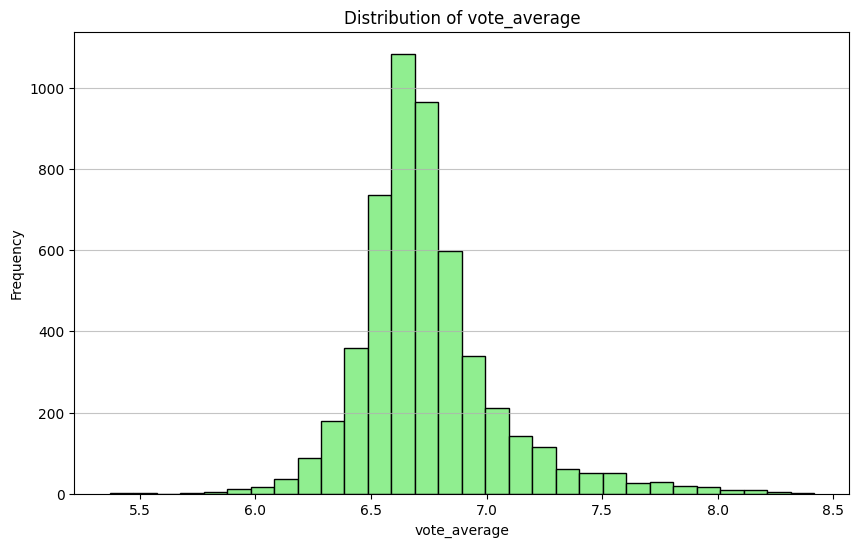

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['weighted_vote'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of vote_average')
plt.xlabel('vote_average')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

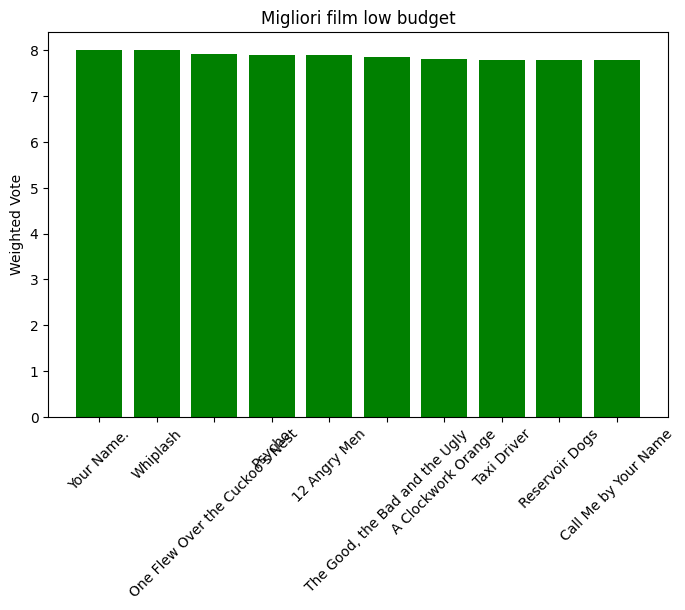

,title,weighted_vote,budget,release_date,genres,spoken_languages
258,Your Name.,7.999165,0,2016-08-26,"Romance, Animation, Drama",Japanese
135,Whiplash,7.999150,3300000,2014-10-10,"Drama, Music",English
297,One Flew Over the Cuckoo's Nest,7.908524,3000000,1975-11-19,Drama,English
321,Psycho,7.905847,806947,1960-06-22,"Horror, Drama, Thriller",English
436,12 Angry Men,7.900004,350000,1957-04-10,Drama,English
423,"The Good, the Bad and the Ugly",7.861096,1200000,1966-12-23,Western,Italian
191,A Clockwork Orange,7.817735,2200000,1971-12-19,"Science Fiction, Drama",English
224,Taxi Driver,7.795906,1900000,1976-02-09,"Crime, Drama","English, Spanish"
148,Reservoir Dogs,7.795384,1200000,1992-09-02,"Crime, Thriller",English
211,Call Me by Your Name,7.779089,4000000,2017-09-01,"Romance, Drama","French, English, Italian"


In [6]:
top_10_low_budget = filtered_df[filtered_df["budget"] <= 5_000_000].sort_values("weighted_vote", ascending=False).head(10)

# Plot singolo
plt.figure(figsize=(8, 5))
plt.bar(top_10_low_budget["title"], top_10_low_budget["weighted_vote"], color="green")
plt.title("Migliori film low budget")
plt.ylabel("Weighted Vote")
plt.xticks(rotation=45)
plt.show()

# Tabella dei risultati
display(top_10_low_budget[['title', 'weighted_vote', 'budget', 'release_date', 'genres','spoken_languages']])

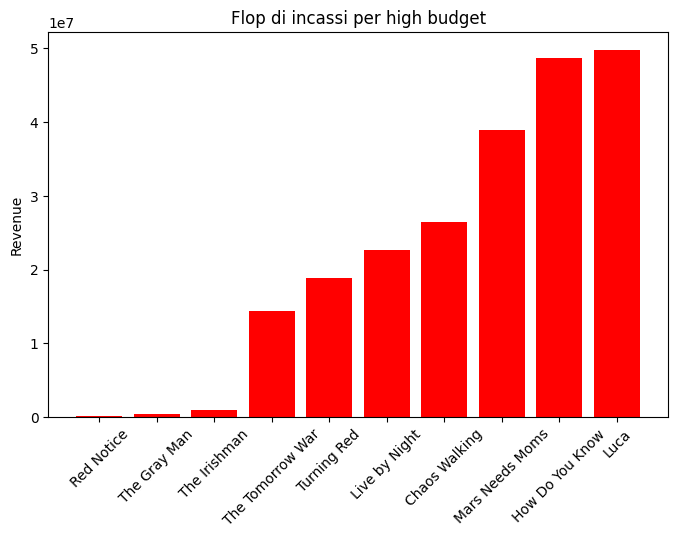

,title,averageRating,weighted_vote,vote_count,budget,revenue,release_date,genres,spoken_languages
806,Red Notice,6.3,6.755181,5135,160000000,178143,2021-11-04,"Action, Comedy, Crime","English, Indonesian, Italian, Russian, Spanish"
1429,The Gray Man,6.5,6.818271,3124,200000000,454023,2022-07-13,"Action, Thriller","Czech, English, French, German, Thai"
612,The Irishman,7.8,7.250615,6203,159000000,968853,2019-11-01,"Crime, Drama, History","English, Italian, Latin, Spanish"
1596,The Tomorrow War,6.6,7.052949,2806,200000000,14400000,2021-09-03,"Action, Science Fiction, Adventure",English
938,Turning Red,7.0,7.086636,4484,190000000,18879922,2022-03-10,"Animation, Family, Comedy, Fantasy","Cantonese, Mandarin, Korean, French, English"
3371,Live by Night,6.4,6.593165,1215,108000000,22678555,2016-12-25,"Crime, Drama, Thriller","English, Spanish"
2081,Chaos Walking,5.7,6.674517,2087,125000000,26508132,2021-02-24,"Fantasy, Science Fiction, Adventure",English
5401,Mars Needs Moms,5.4,6.600575,638,150000000,38992758,2011-03-09,"Adventure, Animation, Family",English
4296,How Do You Know,5.4,6.443325,889,120000000,48668907,2010-12-17,"Comedy, Drama, Romance",English
438,Luca,7.4,7.457978,7625,200000000,49750471,2021-06-17,"Animation, Comedy, Fantasy, Adventure, Family","English, Italian"


In [7]:
# Flop di incassi per high budget
top_10_flop_high_budget = filtered_df[filtered_df["budget"] > 100_000_000].sort_values("revenue", ascending=True).head(10)

# Plot singolo
plt.figure(figsize=(8, 5))
plt.bar(top_10_flop_high_budget["title"], top_10_flop_high_budget["revenue"], color="red")
plt.title("Flop di incassi per high budget")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

# Tabella dei risultati. Ognuno ci puo' aggiungere le diverse series che vuole confrontare 
display(top_10_flop_high_budget[["title","averageRating", "weighted_vote", "vote_count", "budget", "revenue", 'release_date', 'genres','spoken_languages']])


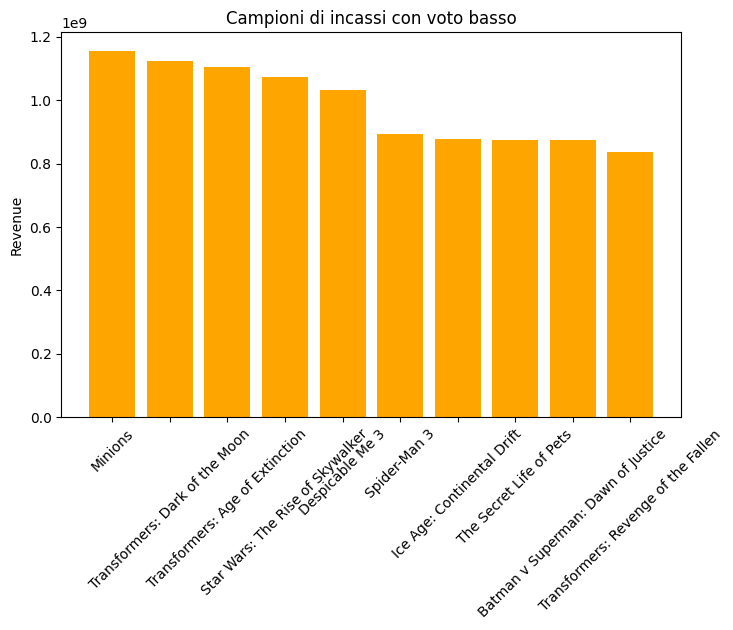

,title,averageRating,weighted_vote,vote_count,budget,revenue,release_date,genres,spoken_languages
272,Minions,6.4,6.481862,9969,74000000,1156730962,2015-06-17,"Family, Animation, Adventure, Comedy",English
426,Transformers: Dark of the Moon,6.2,6.359341,7736,195000000,1123794079,2011-06-28,"Action, Science Fiction, Adventure",English
440,Transformers: Age of Extinction,5.6,6.190510,7581,210000000,1104054072,2014-06-25,"Science Fiction, Action, Adventure",English
337,Star Wars: The Rise of Skywalker,6.4,6.467272,9047,250000000,1074144248,2019-12-18,"Adventure, Action, Science Fiction",English
554,Despicable Me 3,6.2,6.544297,6560,80000000,1031552585,2017-06-15,"Action, Animation, Comedy, Family, Adventure",English
154,Spider-Man 3,6.3,6.468317,13098,258000000,894983373,2007-05-01,"Fantasy, Action, Adventure","English, French"
496,Ice Age: Continental Drift,6.5,6.482606,7038,95000000,877244782,2012-06-27,"Animation, Comedy, Adventure, Family",English
434,The Secret Life of Pets,6.5,6.414650,7664,75000000,875457937,2016-06-18,"Adventure, Comedy, Animation, Family",English
75,Batman v Superman: Dawn of Justice,6.5,6.094837,17081,250000000,873637528,2016-03-23,"Action, Adventure, Fantasy",English
404,Transformers: Revenge of the Fallen,6.0,6.367601,7939,200000000,836303693,2009-06-19,"Science Fiction, Action, Adventure","Spanish, English"


In [8]:
# Campioni di incassi con voto basso
top_10_high_revenue_low_rating = filtered_df[filtered_df["vote_average"] < 6.5].sort_values("revenue", ascending=False).head(10)

# Plot singolo
plt.figure(figsize=(8, 5))
plt.bar(top_10_high_revenue_low_rating["title"], top_10_high_revenue_low_rating["revenue"], color="orange")
plt.title("Campioni di incassi con voto basso")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

# Tabella dei risultati
display(top_10_high_revenue_low_rating[["title","averageRating", "weighted_vote", "vote_count", "budget", "revenue", 'release_date', 'genres','spoken_languages']])


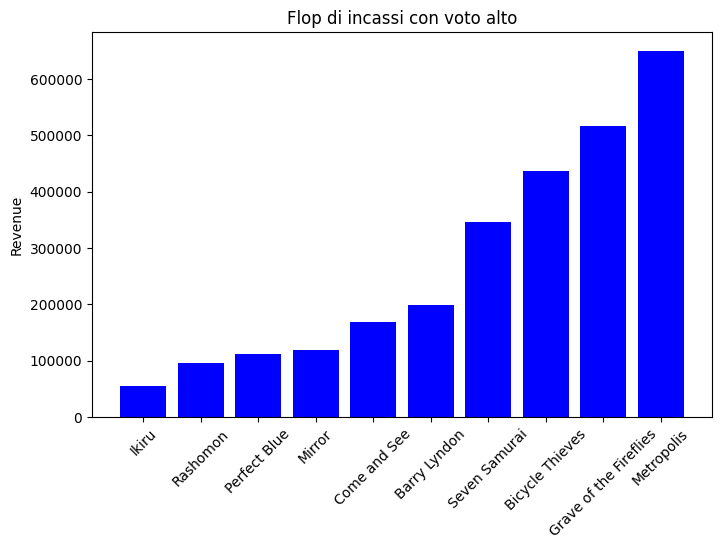

,title,averageRating,weighted_vote,vote_count,budget,revenue,release_date,genres,spoken_languages
3986,Ikiru,8.3,7.014222,982,0,55240,1952-10-09,Drama,Japanese
2213,Rashomon,8.2,7.158970,1956,250000,96568,1950-08-26,"Crime, Drama, Mystery",Japanese
1999,Perfect Blue,8.0,7.249630,2175,830000,112536,1998-02-28,"Animation, Thriller",Japanese
4471,Mirror,7.9,6.919907,839,825370,119266,1975-03-07,"Drama, History","Spanish, Russian"
3379,Come and See,8.3,7.063827,1213,0,168817,1985-07-09,"Drama, War","Belarusian, German, Russian"
1766,Barry Lyndon,8.1,7.198926,2537,11000000,198992,1975-12-18,"Drama, Romance, War","German, French, English"
1377,Seven Samurai,8.6,7.472662,3230,2000000,346300,1954-04-26,"Action, Drama",Japanese
2029,Bicycle Thieves,8.3,7.219226,2146,133000,436655,1948-11-24,Drama,Italian
865,Grave of the Fireflies,8.5,7.653213,4861,3700000,516962,1988-04-16,"Animation, Drama, War",Japanese
1821,Metropolis,8.3,7.240227,2430,1300000,650422,1927-02-06,"Drama, Science Fiction",No Language


In [9]:
# Flop di incassi con voto alto
top_10_low_revenue_high_rating = filtered_df[filtered_df["vote_average"] >= 8.0].sort_values("revenue", ascending=True).head(10)

# Plot singolo
plt.figure(figsize=(8, 5))
plt.bar(top_10_low_revenue_high_rating["title"], top_10_low_revenue_high_rating["revenue"], color="blue")
plt.title("Flop di incassi con voto alto")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

# Tabella dei risultati
display(top_10_low_revenue_high_rating[["title","averageRating", "weighted_vote", "vote_count", "budget", "revenue", 'release_date', 'genres','spoken_languages']])


In [10]:
df = df.drop(['id','backdrop_path', "poster_path", "homepage", "tconst", 'tagline', 'overview', 'keywords', 'spoken_languages', 'release_date', 'writers' , 'status'], axis=1)

# original_title = df['original_title']

# df.drop(['original_title'], axis=1)

In [11]:
df.head(
    
)

,title,vote_average,vote_count,revenue,runtime,adult,budget,original_language,original_title,popularity,genres,production_companies,production_countries,directors,averageRating,numVotes
0,Inception,8.364,34495,825532764,148,False,160000000,en,Inception,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America",Christopher Nolan,8.8,2615046
1,Interstellar,8.417,32571,701729206,169,False,165000000,en,Interstellar,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",Christopher Nolan,8.7,2200215
2,The Dark Knight,8.512,30619,1004558444,152,False,185000000,en,The Dark Knight,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America",Christopher Nolan,9.0,2946971
3,Avatar,7.573,29815,2923706026,162,False,237000000,en,Avatar,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom",James Cameron,7.9,1409099
4,The Avengers,7.710,29166,1518815515,143,False,220000000,en,The Avengers,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,Joss Whedon,8.0,1483869


In [12]:
gruppo_registi = df.groupby('directors')['averageRating'].mean()

sottogruppi = {
    "Da 0 a 4": gruppo_registi[(gruppo_registi >= 0) & (gruppo_registi < 4)],
    "Da 4 a 7": gruppo_registi[(gruppo_registi >= 4) & (gruppo_registi < 7)],
    "Da 7 a 10": gruppo_registi[(gruppo_registi >= 7) & (gruppo_registi <= 10)]
}

# Stampare i risultati
for fascia, gruppo in sottogruppi.items():
    print(f"--- {fascia} ---")
    print(gruppo)
    


--- Da 0 a 4 ---
directors
'Bob' Insert               3.9
'Philthy' Phil Phillips    3.8
2KTHOMAS, Calliope Var     3.0
A. Danielyan               2.7
A. Jagadesh                3.8
                          ... 
Özgür Dogruöz              2.5
Özgür Yelence              3.2
Özgür Özberk               3.2
Özlem Yesilyurt            3.1
Ümit Degirmenci            2.8
Name: averageRating, Length: 7667, dtype: float64
--- Da 4 a 7 ---
directors
'Evil' Ted Smith                                       4.000000
'Horny' Harry                                          6.675000
50 Cent, J. Jesses Smith                               4.700000
A'Ali de Sousa                                         4.300000
A. Akbarxojayev                                        6.400000
                                                         ...   
Ünal Küpeli                                            5.025000
Þorsteinn Gunnar Bjarnason                             5.800000
Þorsteinn Jónsson                          

In [13]:
da_0_a_4 = gruppo_registi[(gruppo_registi >= 0) & (gruppo_registi < 4)].sort_values(ascending=False)
da_4_a_7 = gruppo_registi[(gruppo_registi >= 4) & (gruppo_registi < 7)].sort_values(ascending=False)
da_7_a_10 = gruppo_registi[(gruppo_registi >= 7) & (gruppo_registi <= 10)].sort_values(ascending=False)

# Stampare i risultati ordinati
print("--- Da 0 a 4 (Classifica) ---")
print(da_0_a_4)

print("\n--- Da 4 a 7 (Classifica) ---")
print(da_4_a_7)

print("\n--- Da 7 a 10 (Classifica) ---")
print(da_7_a_10)

--- Da 0 a 4 (Classifica) ---
directors
Bernard-Henri Lévy                              4.000000
Ted Peshak                                      3.995652
Micheal Bafaro                                  3.990909
Tommy Brunswick                                 3.990909
Tom DeNucci                                     3.988889
                                                  ...   
Geshin Salvador                                 1.000000
De Gaulle Eid                                   1.000000
Fuat Kurtoglu                                   1.000000
Alexia Kosmider, Blue Wade                      1.000000
Andrew Butler, James Andrew Mackenzie Wilson    1.000000
Name: averageRating, Length: 7667, dtype: float64

--- Da 4 a 7 (Classifica) ---
directors
Keith Truesdell          6.997674
Hirokazu Koreeda         6.995652
Rudolf Jugert            6.995122
Anurag Kashyap           6.994444
Kira Muratova            6.994118
                           ...   
Aghasi Ayvazyan          4.000000
Mura

In [14]:
da_7_a_10.count()
#registi con media voto da 7 a 10 seconda fascia in termini di volume 
#volendo si possono fare altri sottosegmenti per vedere le presenze in base a fasce di medie voto piu' specifiche

np.int64(53138)

In [15]:
da_4_a_7.count() 
#registi con media voto da 4 a 7 prima fascia in termini di volume 

np.int64(99450)

In [16]:
da_0_a_4.count()

np.int64(7667)

In [17]:
df["adult"].replace("False", 0, inplace = True)
df["adult"].replace("True", 1, inplace = True)

/tmp/ipykernel_28601/3762253385.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["adult"].replace("False", 0, inplace = True)
/tmp/ipykernel_28601/3762253385.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [18]:
df['genere_film'] = df['genres'].str.split(',').str[0]

In [19]:
df['genere_film'].nunique()

19

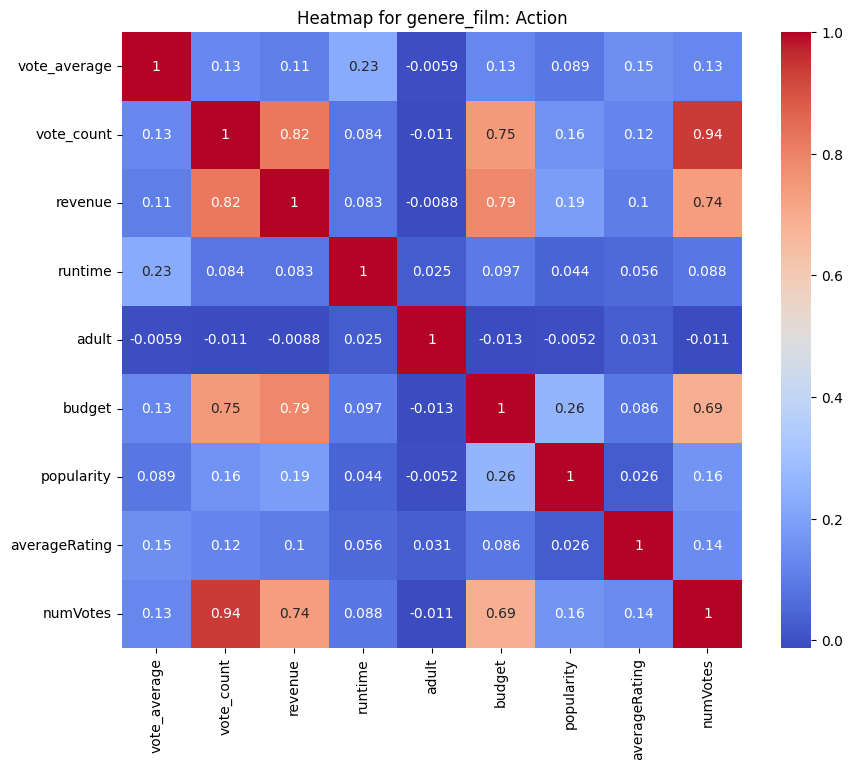

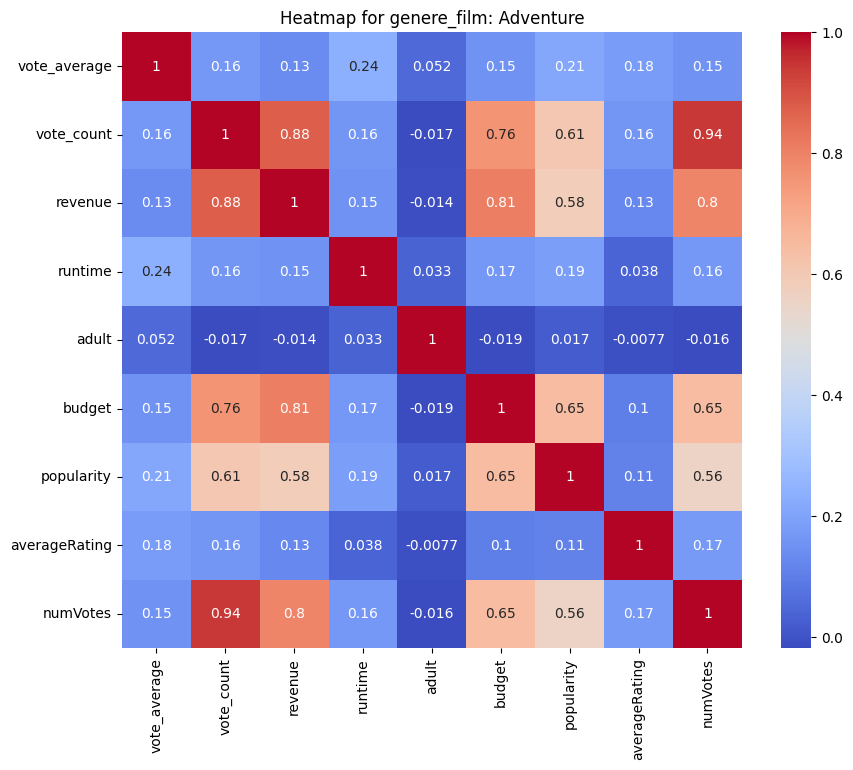

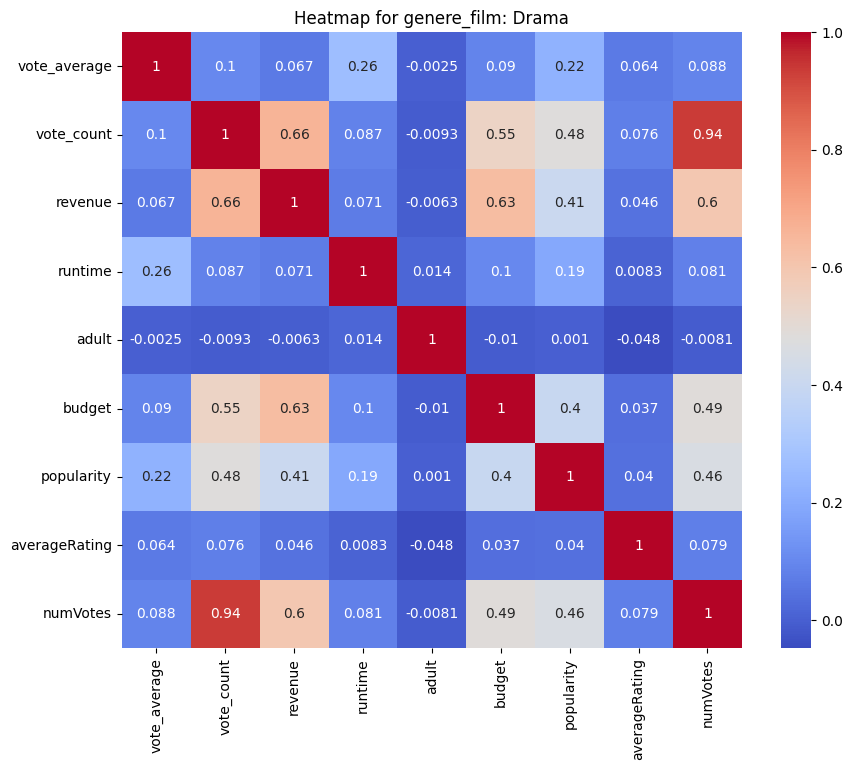

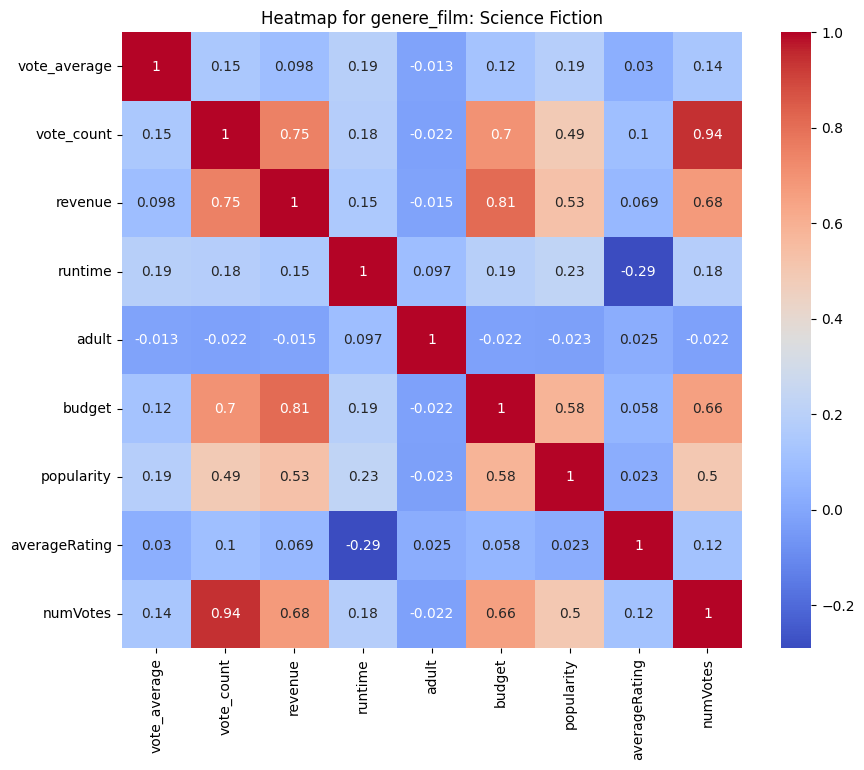

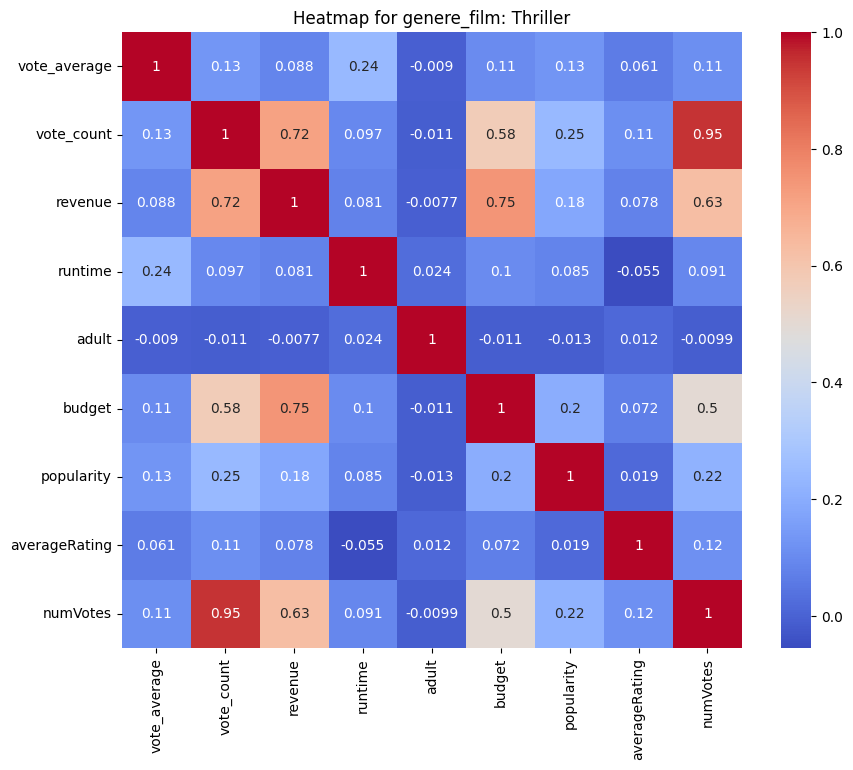

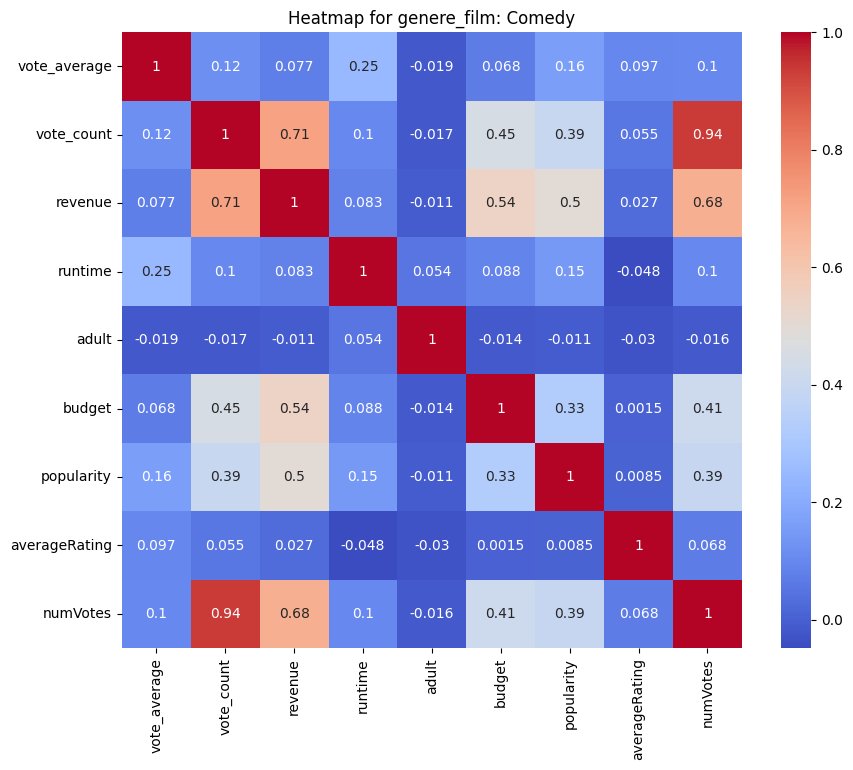

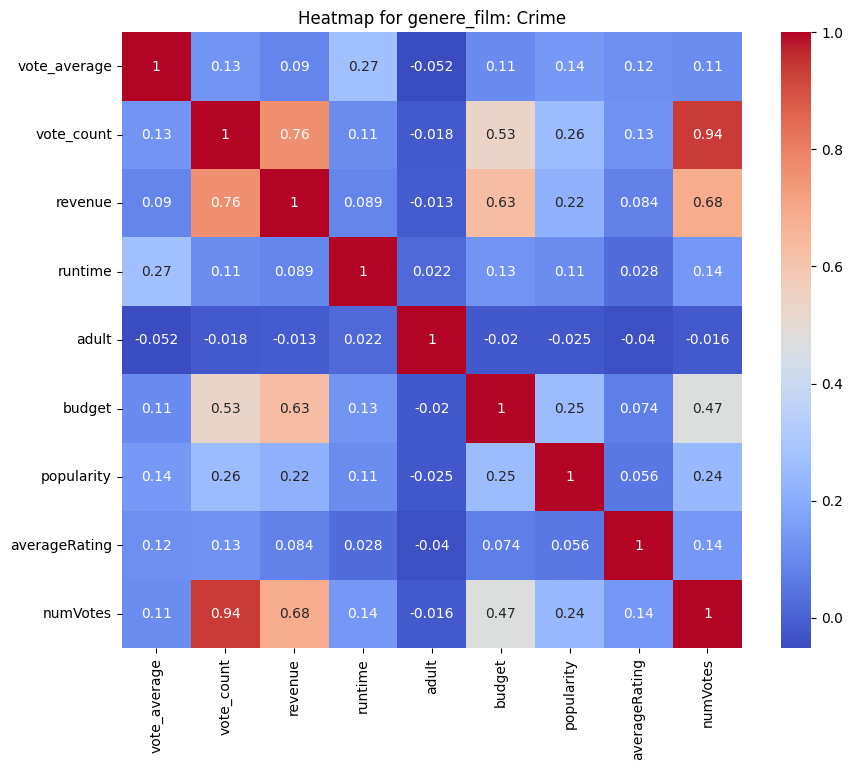

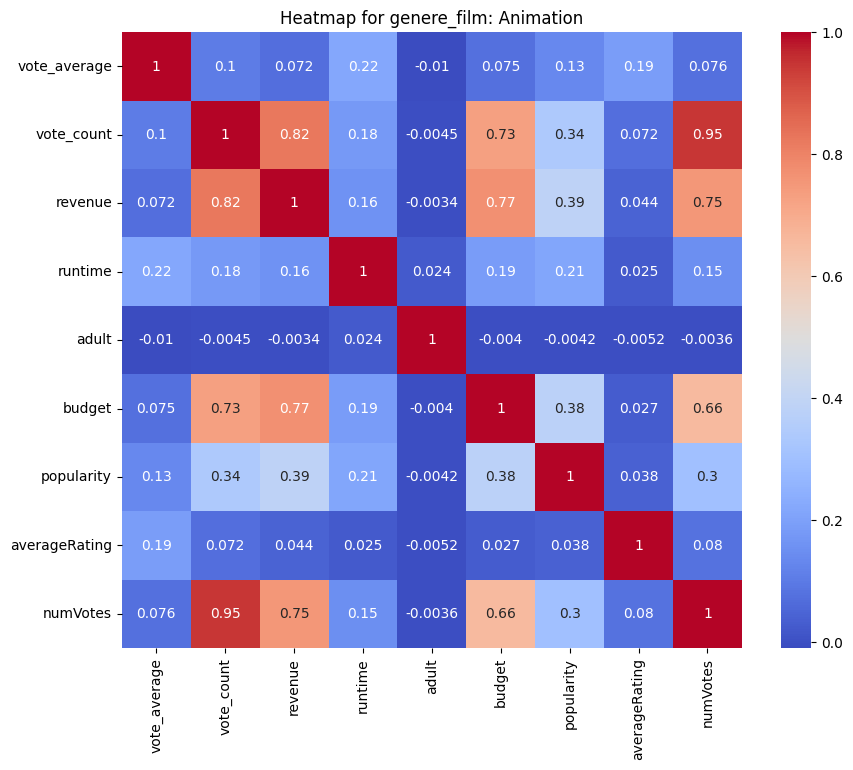

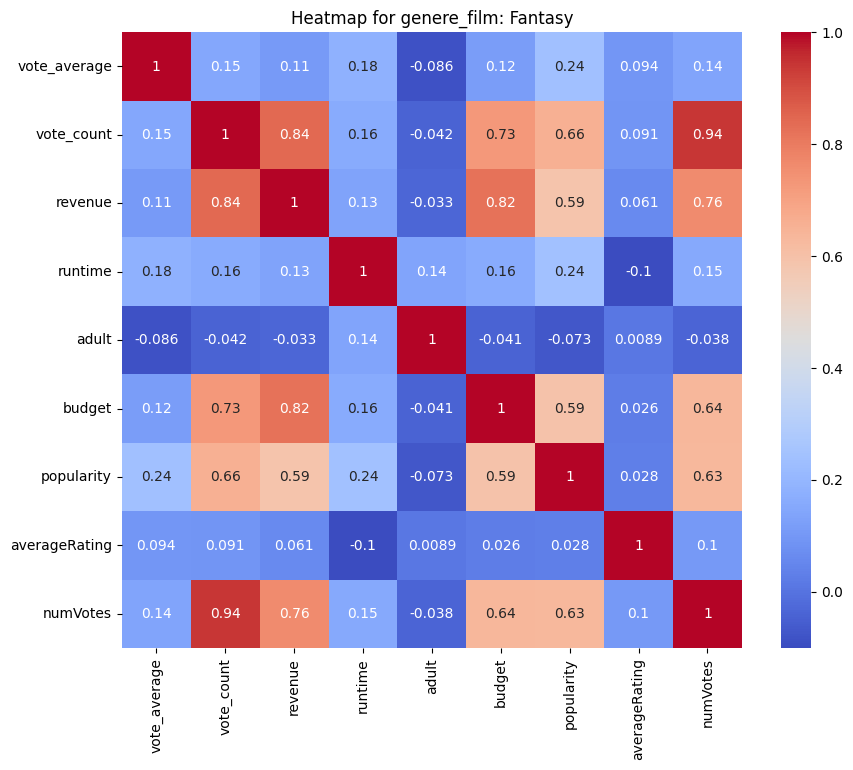

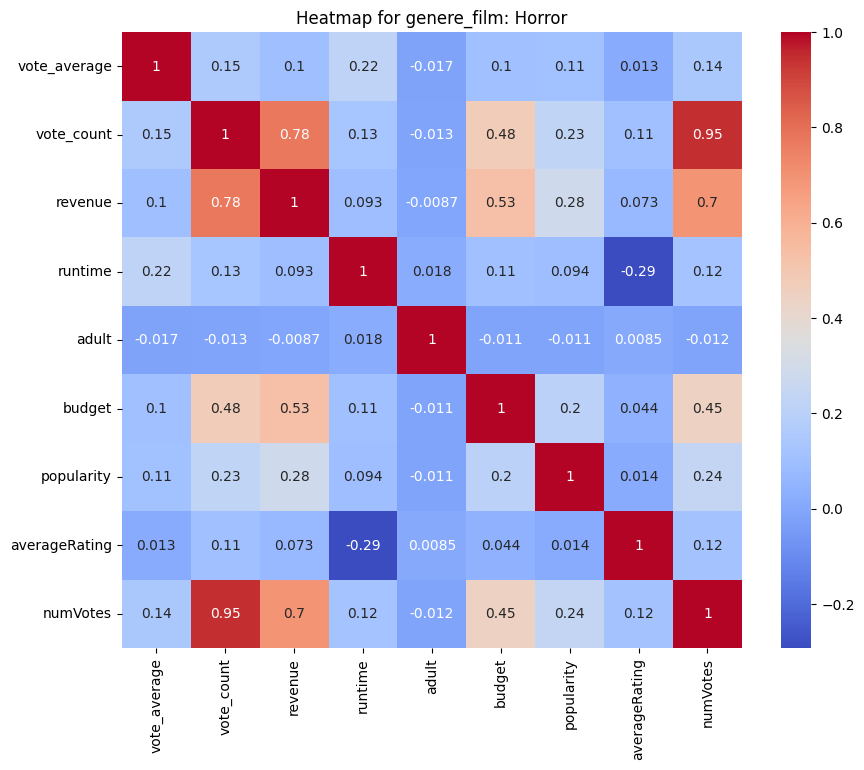

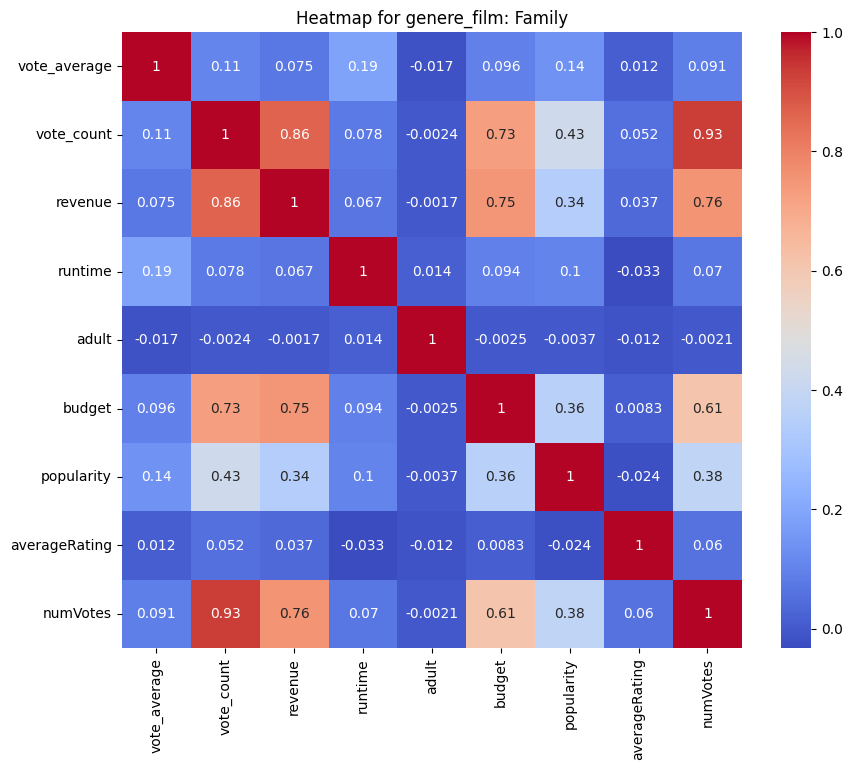

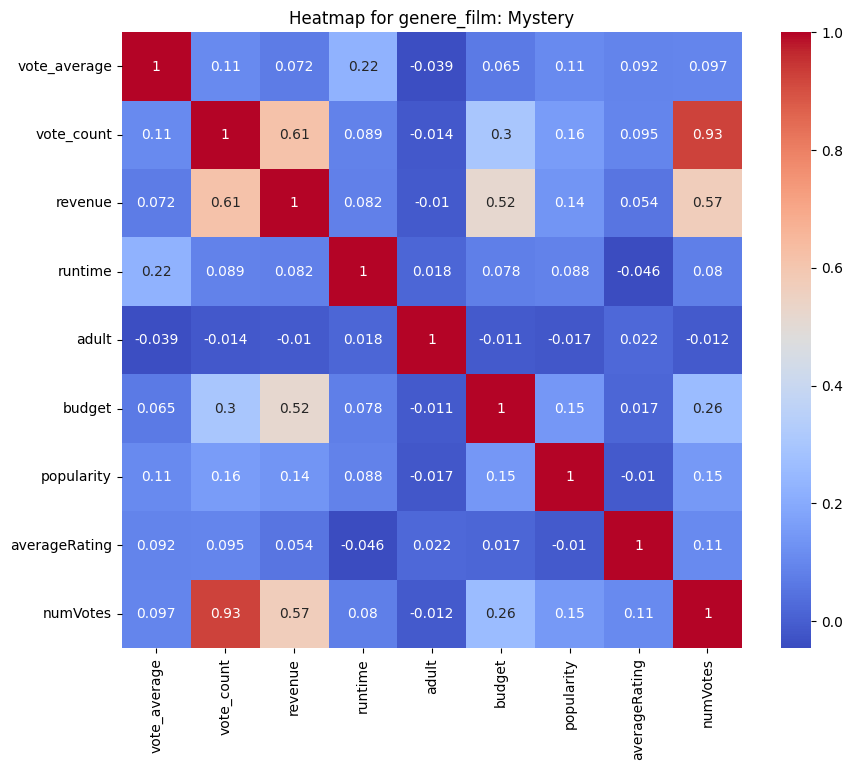

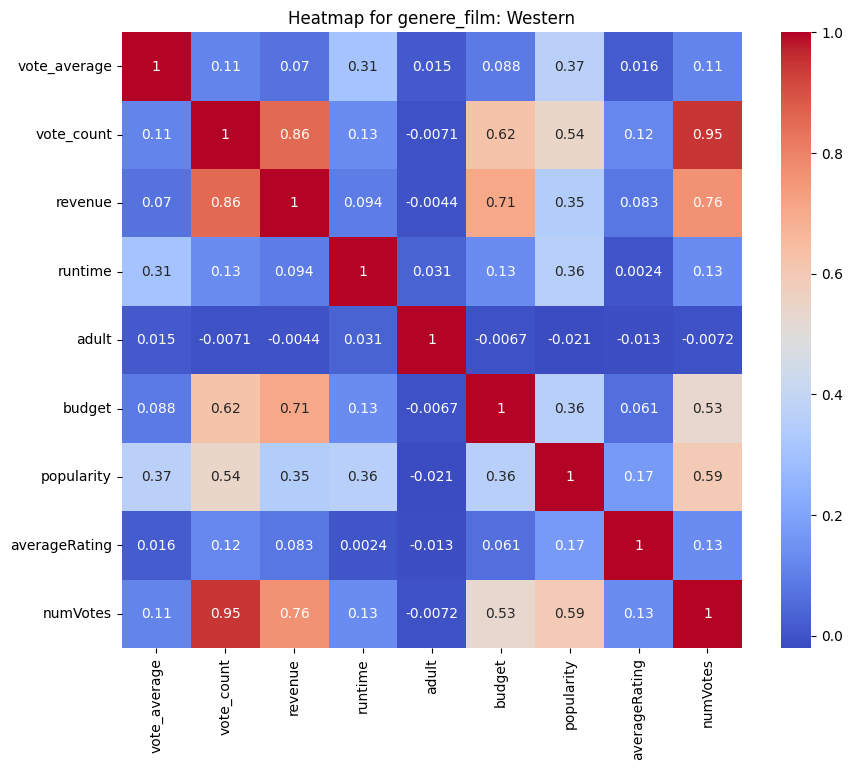

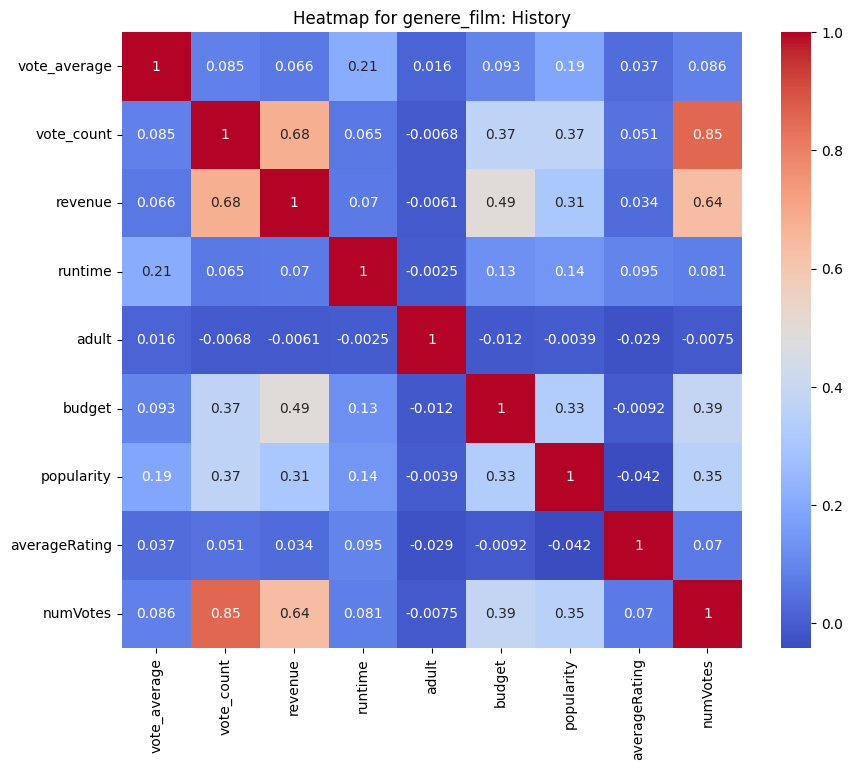

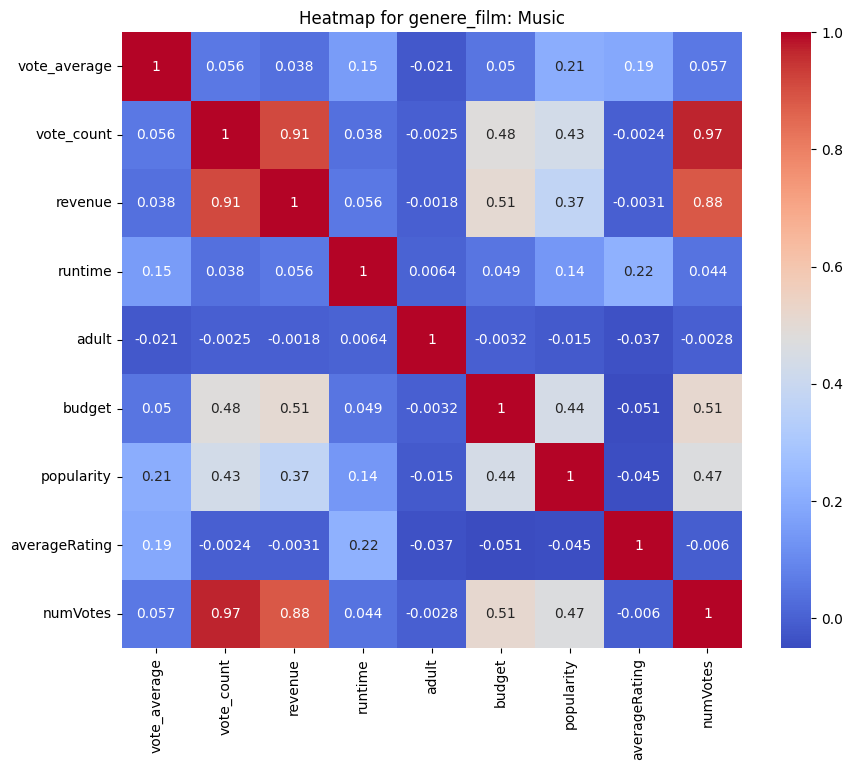

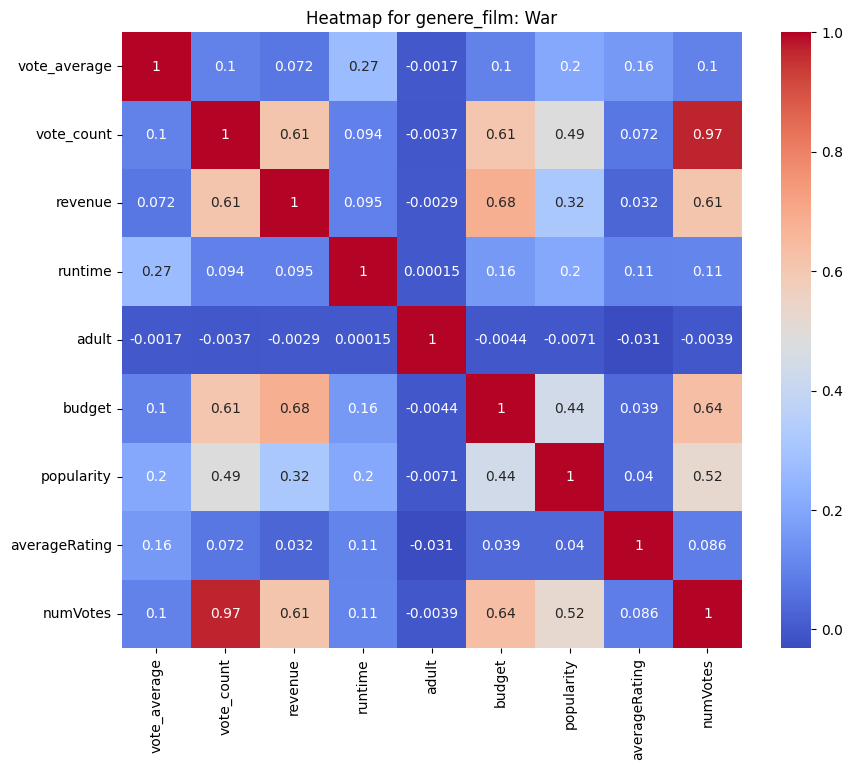

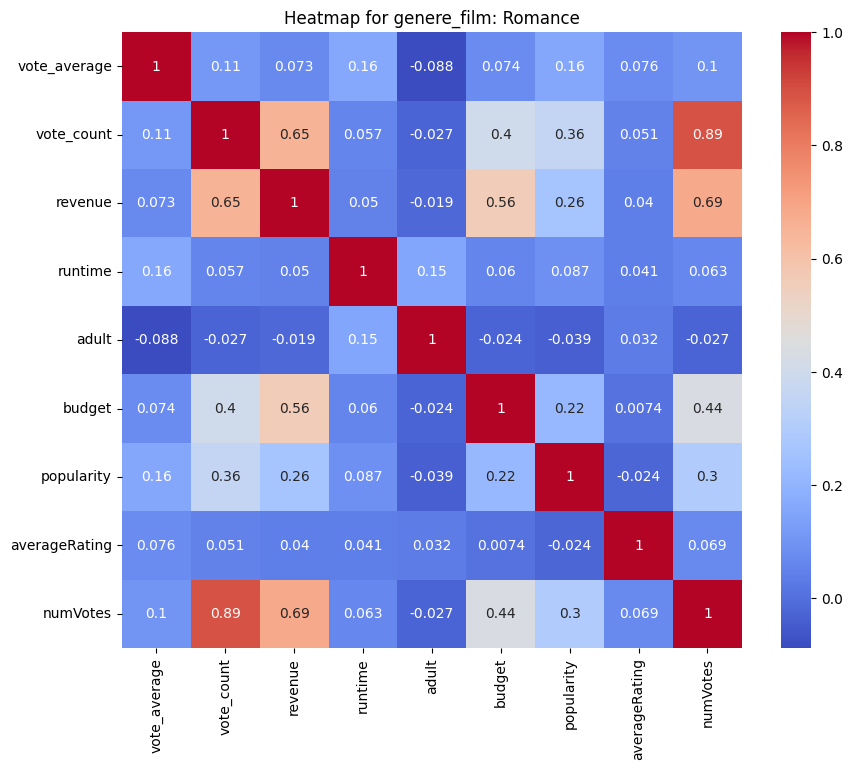

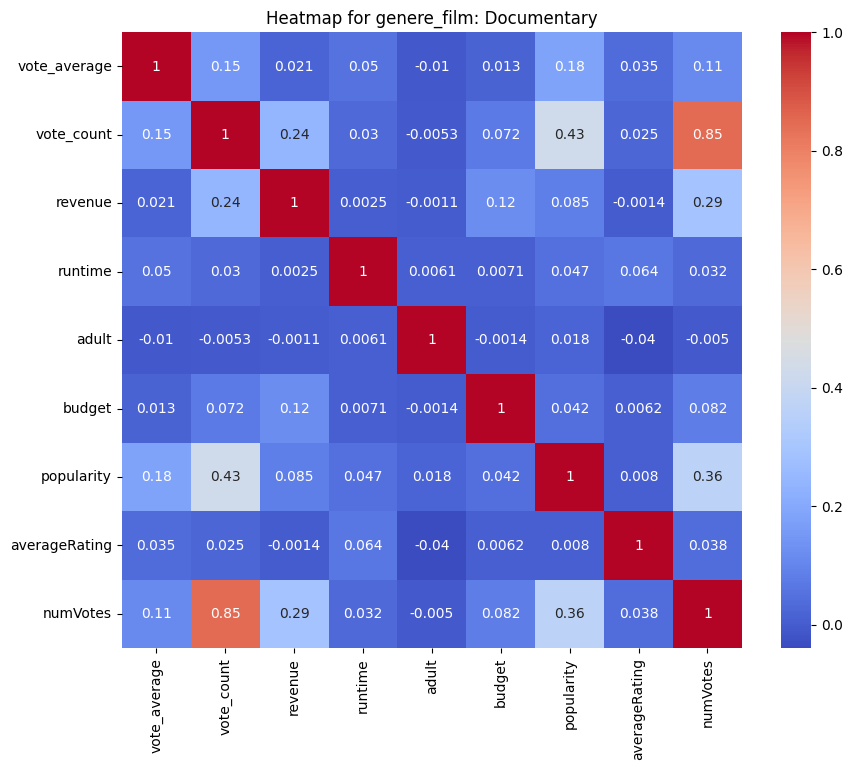

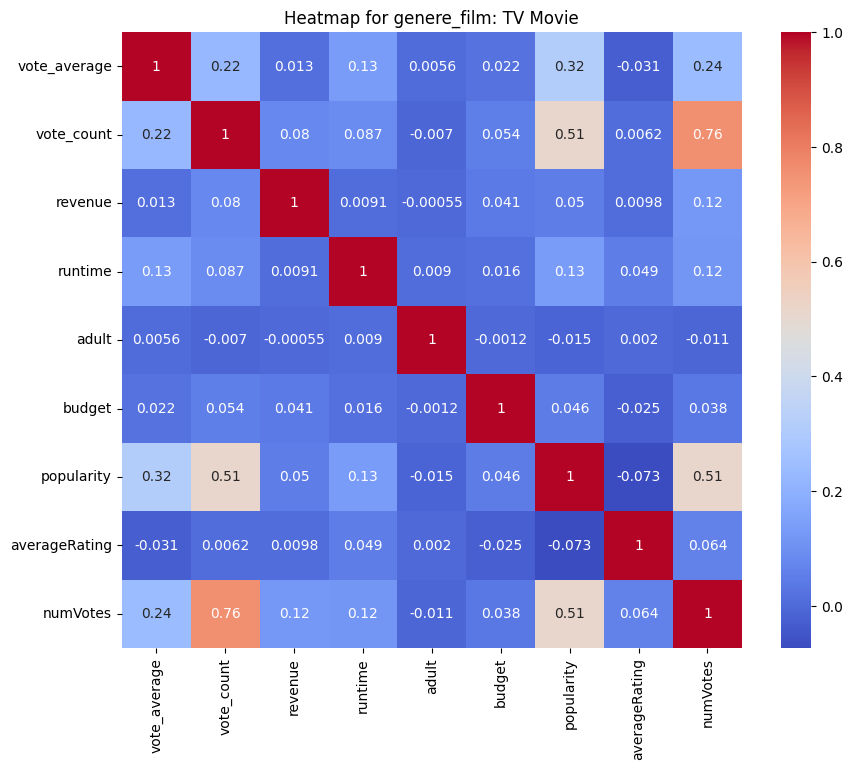

In [20]:
def analyze_and_plot_fixed(dataframe, group_col, base_path):
    # Lista per DataFrame filtrati e correlazioni
    filtered_corr_list = []
    
    # Valori unici della colonna
    unique_values = dataframe[group_col].unique()
    
    for value in unique_values:
        # Filtra il DataFrame
        df_filtered = dataframe[dataframe[group_col] == value]
        
        if df_filtered.empty:
            continue  # Salta se il DataFrame è vuoto
        
        # Nome del gruppo
        group_name = str(df_filtered[group_col].iloc[0]).replace("/", "-")  # Gestione di caratteri speciali
        
        # Rimuovi le colonne non necessarie
        df_cleaned = df_filtered.drop(['title',"original_title", 'directors', 'production_companies', 'produzione_nazione','produzione_compagnie' ,'production_countries', 'genres', 'original_language','genere_film'], axis=1, errors='ignore')
        
        
        
        # Calcola la matrice di correlazione
        corr_matrix = df_cleaned.corr()
        
        # Filtra correlazioni significative
        filtered = corr_matrix.where(((corr_matrix > 0.3) | (corr_matrix < -0.3)) & (corr_matrix != 1)).stack()
        filtered_corr_list.append((f'{group_col} name: {group_name}\n', filtered))
        
        # Crea la directory per salvare le immagini
        save_path = os.path.join(base_path, group_col)
        os.makedirs(save_path, exist_ok=True)
        
        # Plotta la heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
        plt.title(f'Heatmap for {group_col}: {group_name}')
        
        # # Salva il grafico
        # plt.savefig(f'{save_path}/{group_name}_heatmap.png', bbox_inches='tight')
        # plt.close()  # Chiudi il grafico per evitare conflitti
        
    return filtered_corr_list

# Applica la funzione corretta
base_path = './image'
filtered_corr_gerere = analyze_and_plot_fixed(df,'genere_film', base_path)







In [21]:
# Preparazione del filtro per i primi 10 registi
top_10_directors = (
    df.groupby('directors')['vote_average']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index)


#Filtra il DataFrame per includere solo i registi selezionati
df_top_directors = df[df['directors'].isin(top_10_directors)]

In [22]:
# filtered_corr_directors = analyze_and_plot_fixed(df_top_directors, 'directors', base_path)
#non utilizzare perche non funziona bene con questo tipo di filtro da ottimizzare 


In [23]:
def corr_comuni(filtered_corr_list,nome_lista):

    correlation_dict = {}

    for group_info, filtered_corr in filtered_corr_list:
        group_name = group_info.strip()  # Estrai nome del brand
        for (col1, col2), value in filtered_corr.items():
            pair = tuple(sorted([col1, col2]))
            correlation_dict.setdefault(pair, set()).add(group_name)

    #Filtra le coppie presenti in almeno 2 brand
    relevant_correlations = {pair: names for pair, names in correlation_dict.items() if len(names) >= 2}

    #Stampa i risultati
    print(f"Correlazioni presenti in 2 o più {nome_lista}:")
    for pair, names in relevant_correlations.items():
        print(f"{pair}: presenti in {len(names)} {nome_lista} -> {', '.join(names)}")

    return relevant_correlations

#correlazzione per ogni coppia che compare in almeno 2 o piu generi di film
relevant_correlations_genere = corr_comuni(filtered_corr_gerere,"genere_film")

Correlazioni presenti in 2 o più genere_film:
('revenue', 'vote_count'): presenti in 17 genere_film -> genere_film name: Adventure, genere_film name: Action, genere_film name: Comedy, genere_film name: Mystery, genere_film name: Horror, genere_film name: War, genere_film name: Fantasy, genere_film name: Family, genere_film name: Science Fiction, genere_film name: Thriller, genere_film name: Western, genere_film name: Crime, genere_film name: History, genere_film name: Music, genere_film name: Romance, genere_film name: Drama, genere_film name: Animation
('budget', 'vote_count'): presenti in 16 genere_film -> genere_film name: Adventure, genere_film name: Action, genere_film name: Comedy, genere_film name: Horror, genere_film name: War, genere_film name: Fantasy, genere_film name: Family, genere_film name: Science Fiction, genere_film name: Thriller, genere_film name: Western, genere_film name: Crime, genere_film name: History, genere_film name: Music, genere_film name: Romance, genere_

/tmp/ipykernel_28601/1715947235.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occurrences, y=pairs, palette="viridis")


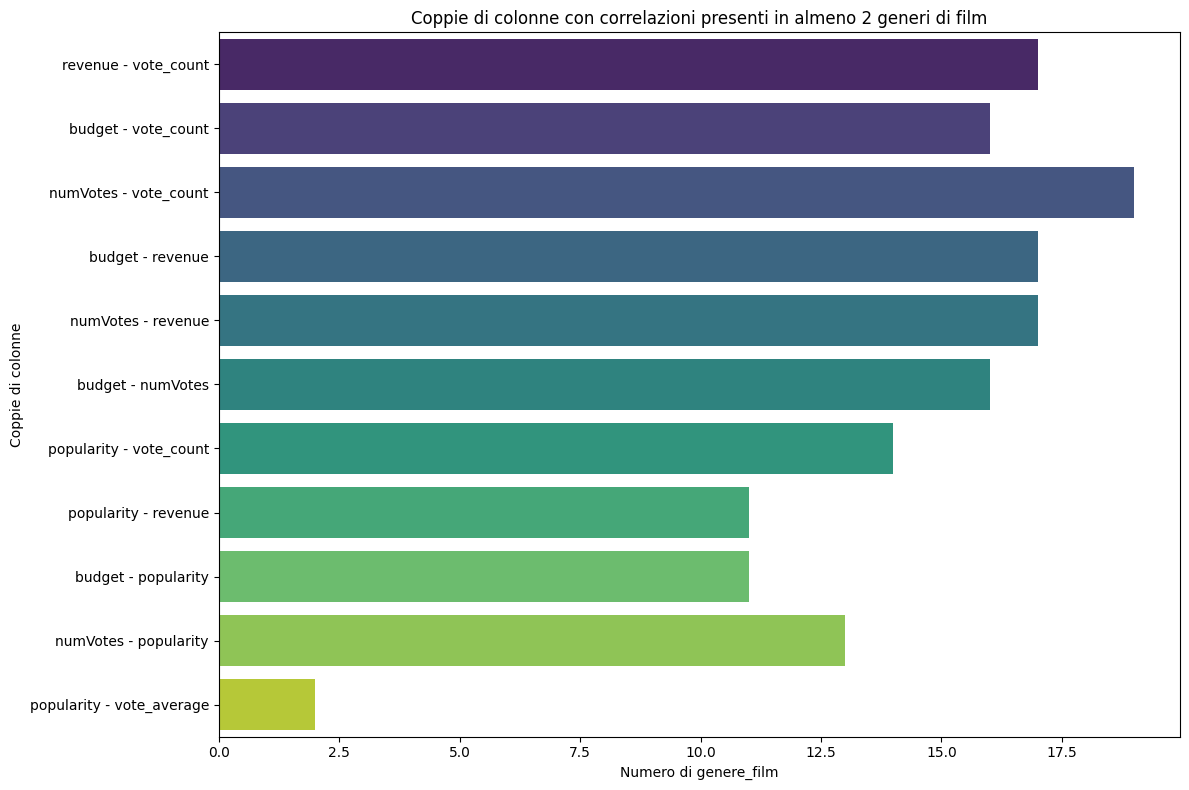

In [24]:
def barplots_corr(relevant_correlations, nome_lista):
    pairs = []
    occurrences = []
    for pair, element in relevant_correlations.items():
        pairs.append(f"{pair[0]} - {pair[1]}")
        occurrences.append(len(element))

    # Visualizzazione con Matplotlib e Seaborn
    plt.figure(figsize=(12, 8))
    sns.barplot(x=occurrences, y=pairs, palette="viridis")
    plt.xlabel(f"Numero di {nome_lista}")
    plt.ylabel("Coppie di colonne")
    plt.title("Coppie di colonne con correlazioni presenti in almeno 2 generi di film")
    plt.tight_layout()
    plt.show()


barplots_corr(relevant_correlations_genere,"genere_film")


/tmp/ipykernel_28601/2266515021.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data = heatmap_data.fillna(0)


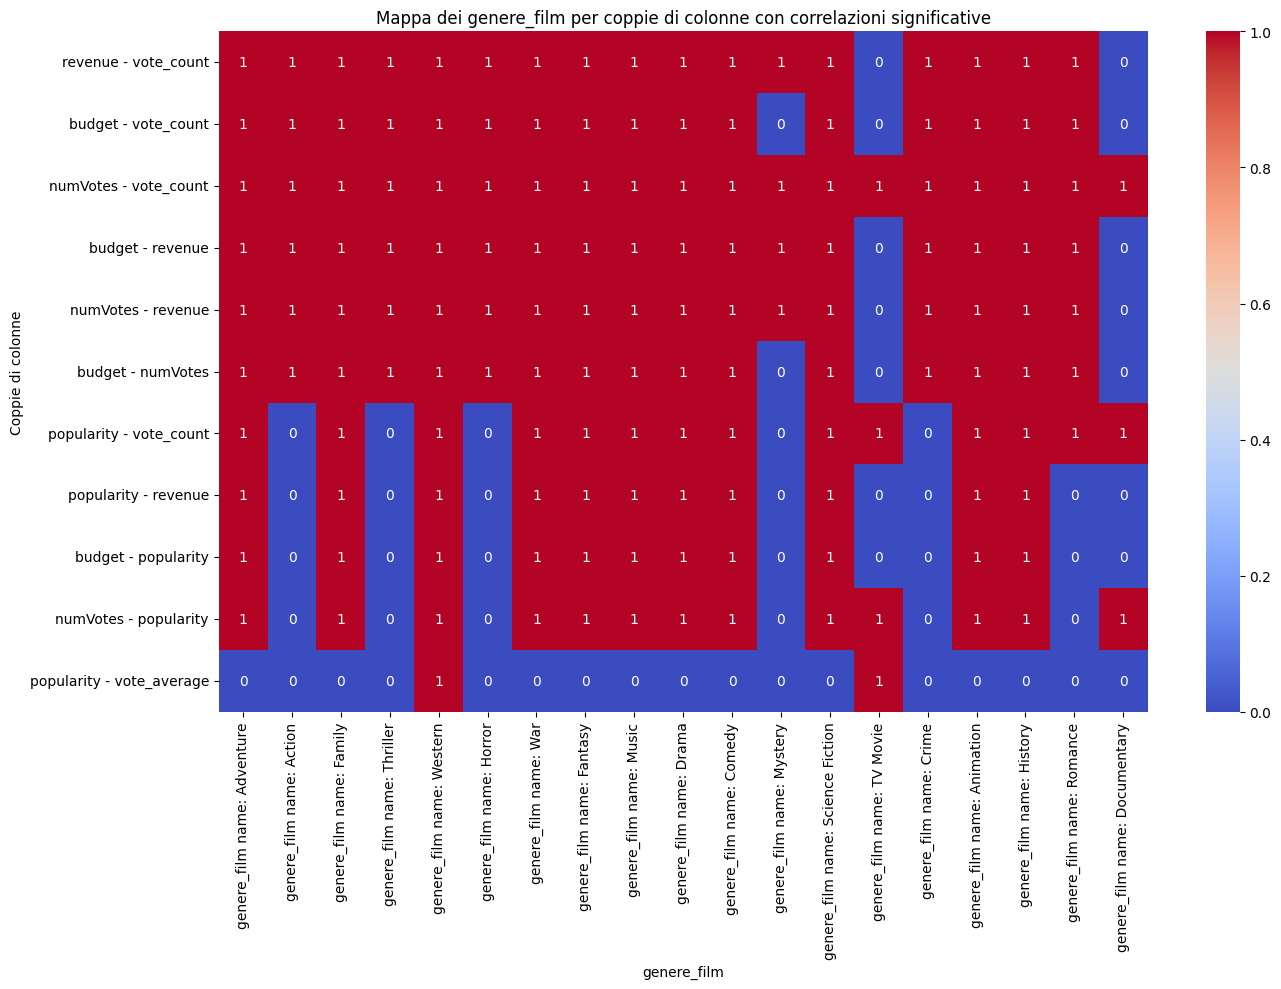



---------------------




In [25]:
def heatmap_corr(relevant_correlations, nome_lista):

    pairs = []
    occurrences = []
    for pair, element in relevant_correlations.items():
        pairs.append(f"{pair[0]} - {pair[1]}")
        occurrences.append(len(element))
    
    heatmap_data = pd.DataFrame(index=pairs, columns=list({el for elements in relevant_correlations.values() for el in elements}))
    for pair, elements in relevant_correlations.items():
        row_label = f"{pair[0]} - {pair[1]}"
        for el in elements:
            heatmap_data.at[row_label, el] = 1


    heatmap_data = heatmap_data.fillna(0)
    
    # Plot della heatmap
    plt.figure(figsize=(14, 10))
    sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar=True)
    plt.title(f"Mappa dei {nome_lista} per coppie di colonne con correlazioni significative")
    plt.xlabel(f"{nome_lista}")
    plt.ylabel("Coppie di colonne")
    plt.tight_layout()
    plt.show()
    
heatmap_corr(relevant_correlations_genere, "genere_film")
print("\n\n---------------------\n\n")